In [61]:
%matplotlib inline
from scipy.io import arff
import numpy as np
from sklearn import cross_validation

##  データセットを読み込む
dataset, meta = arff.loadarff("DARPA99Week3-0.arff")
# dataset[0]


In [71]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 配列の型をtensorflow/kerasが扱えるnumpyのarrayに変換
ds=np.asarray(dataset.tolist(), dtype=np.float32)
target=np.asarray(ds[:,22].tolist(), dtype=np.int8)
train=ds[:, :21]

## 正規化
mms = MinMaxScaler()
x_norm = mms.fit_transform(train)

## 訓練データとテストデータに分離
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    x_norm, target, test_size=0.2
)

# convert class vectors to 1-of-K format
y_train = np_utils.to_categorical(train_y, 2)
y_test = np_utils.to_categorical(test_y, 2)

print('x for train: ', train_x.shape)
print('x for test: ', test_x.shape)
print('y for train: ', y_train.shape)
print('y for test: ', y_test.shape)


x for train:  (50606, 21)
x for test:  (12652, 21)
y for train:  (50606, 2)
y for test:  (12652, 2)


In [74]:

# モデルの定義
model = Sequential()

# ネットワークの定義
model.add(Dense(input_dim=21, output_dim=20))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(input_dim=20, output_dim=20))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(input_dim=20, output_dim=10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## OUTPUT  SSH or NOTSSH
model.add(Dense(output_dim=2))
model.add(Activation('softmax'))

# ネットワークのコンパイル
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

# 学習処理
hist = model.fit(train_x, y_train, nb_epoch = 10, batch_size = 100, verbose=1)

# 学習結果の評価
score = model.evaluate(test_x, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
50606/50606 [==============================] - 1s - loss: 0.2669 - acc: 0.9484     
Epoch 2/10
50606/50606 [==============================] - 1s - loss: 0.1090 - acc: 0.9832     
Epoch 3/10
50606/50606 [==============================] - 1s - loss: 0.0733 - acc: 0.9869     
Epoch 4/10
50606/50606 [==============================] - 1s - loss: 0.0597 - acc: 0.9892     
Epoch 5/10
50606/50606 [==============================] - 1s - loss: 0.0495 - acc: 0.9913     
Epoch 6/10
50606/50606 [==============================] - 1s - loss: 0.0458 - acc: 0.9923     
Epoch 7/10
50606/50606 [==============================] - 1s - loss: 0.0427 - acc: 0.9925     
Epoch 8/10
50606/50606 [==============================] - 1s - loss: 0.0400 - acc: 0.9935     
Epoch 9/10
50606/50606 [==============================] - 1s - loss: 0.0374 - acc: 0.9938     
Epoch 10/10
12096/12652 [===========================>..] - ETA: 0sTest loss: 0.0282513894941
Test accuracy: 0.997707872273


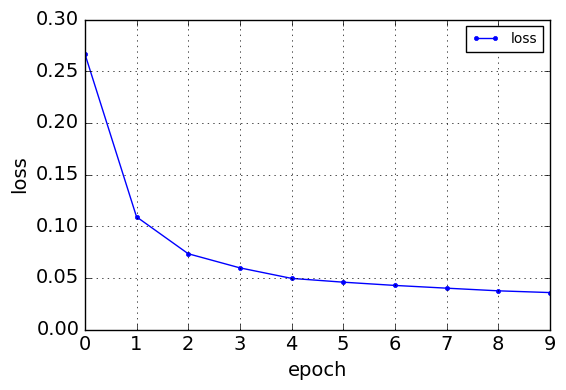

In [75]:
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

# plot loss
loss = hist.history['loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
